# APEX Gun 

In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6,6)
%config InlineBackend.figure_format = 'retina'

NUMPROCS=8

In [2]:
from distgen import Generator

G = Generator('distgen_laser.yaml')
G['n_particle'] = 100000
G

<disgten.Generator with input: 
n_particle: 100000
output:
  type: null
random_type: hammersley
species: electron
start:
  MTE:
    units: millielectron_volt
    value: 250.0
  type: cathode
t_dist:
  avg_t:
    units: picosecond
    value: 0.0
  n_sigma_cutoff: 3
  sigma_t:
    units: picosecond
    value: 8.5
  type: gaussian
total_charge:
  units: picocoulomb
  value: 10.0
transforms: null
xy_dist:
  file: /Users/chrisonian/Code/GitHub/lume-impact/docs/examples/templates/apex_gun/2019_11_04_135614reg_out.txt
  type: file2d

>

In [3]:
G.run()
G.particles

<ParticleGroup with 100000 particles at 0x108074890>

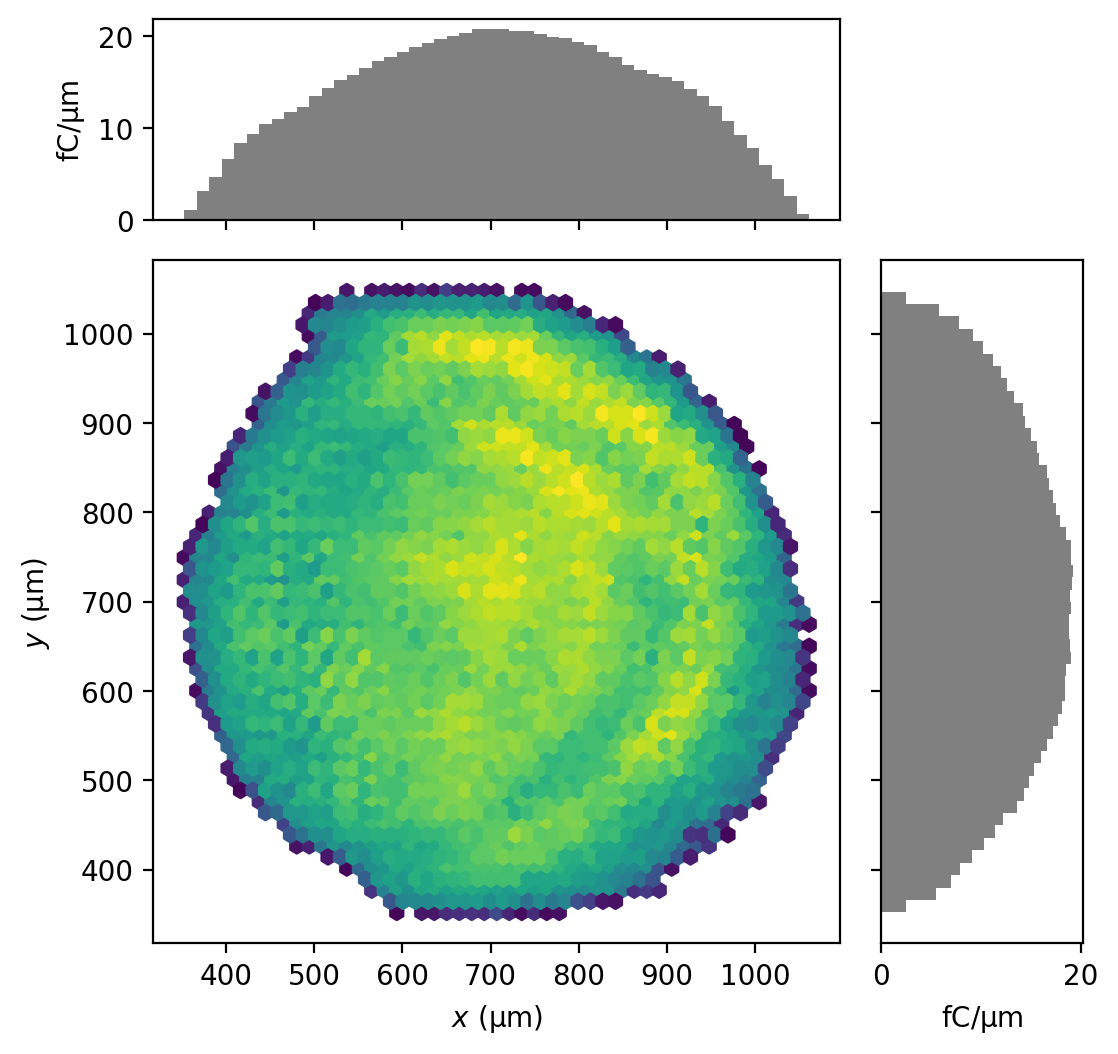

In [4]:
G.particles.plot('x', 'y', bins=50)

In [5]:
from impact import Impact

In [6]:
I = Impact('ImpactT.in', initial_particles=G.particles)

In [7]:
# Turn space charge off
I.total_charge = 0
I.stop = 0.5
I.numprocs = NUMPROCS

In [8]:
%%time
I.run()

CPU times: user 563 ms, sys: 76.3 ms, total: 639 ms
Wall time: 26.4 s


In [9]:
I.output.keys()

dict_keys(['run_info', 'stats', 'slice_info', 'particles'])

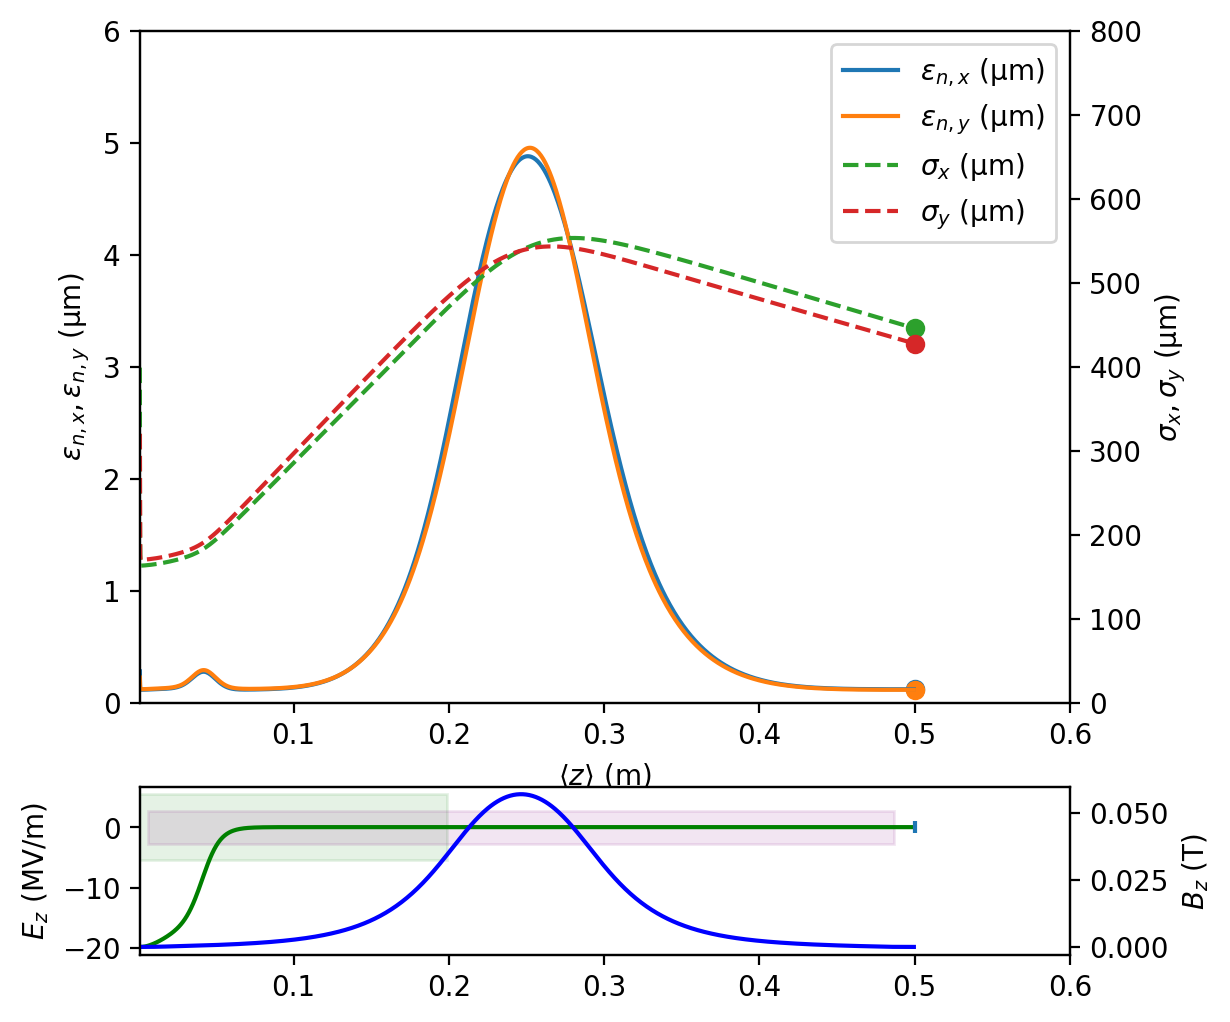

In [10]:
fig = I.plot(y=['norm_emit_x', 'norm_emit_y'], y2=['sigma_x', 'sigma_y'], xlim=(1e-3,.6), ylim=(0, 6e-6), ylim2=(0, 800e-6),figsize=(6,6), return_figure=True)
#fig.axes[0].set_title('LUME-Impact')
plt.savefig('apex-gun-lume-impact.png', dpi=150, bbox_inches='tight')

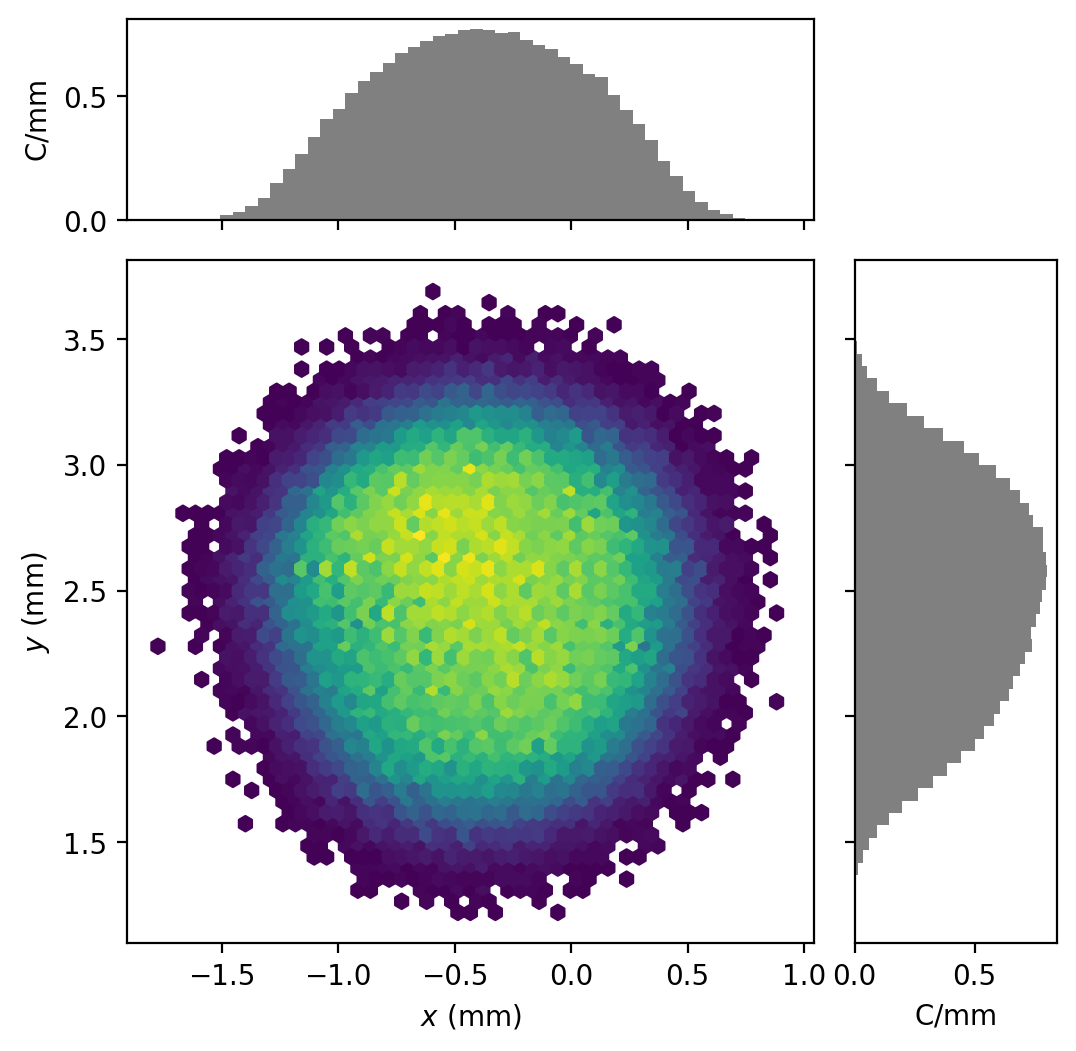

In [11]:
I.particles['final_particles'].plot('x', 'y', bins=50)